In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [19]:
df=pd.read_csv("/content/Credit Card Fraud Detection.csv")

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.shape

(284807, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


##Linear Regration

In [33]:
from sklearn.linear_model import LinearRegression

X = df.drop(["V28"], axis=1)

y = df["V28"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


print("Value:", list(y[:10]))

Value: [-0.0210530534538215, 0.0147241691924927, -0.0597518405929204, 0.0614576285006353, 0.215153147499206, 0.0810802569229443, 0.0051677689062491, -1.08533918832377, 0.14240432992147, 0.0830756493473326]


In [34]:
from sklearn.linear_model import LinearRegression

X = df.drop(["V12"], axis=1)

y = df["V12"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


print("Value:", list(y[:9]))

Value: [-0.617800855762348, 1.06523531137287, 0.066083685268831, 0.178228225877303, 0.53819555014995, 0.359893837038039, -0.153825826253651, 0.291474353088705, -0.110452261733098]


In [35]:
from sklearn.linear_model import LinearRegression

X = df.drop(["V6"], axis=1)

y = df["V6"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


print("Value:", list(y[:5]))

Value: [0.462387777762292, -0.0823608088155687, 1.80049938079263, 1.24720316752486, 0.0959214624684256]


In [36]:
from sklearn.linear_model import LinearRegression

X = df.drop(["V1"], axis=1)

y = df["V1"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


print("Value:", list(y[:7]))

Value: [-1.3598071336738, 1.19185711131486, -1.35835406159823, -0.966271711572087, -1.15823309349523, -0.425965884412454, 1.22965763450793]


##Feature Scaling :StandardScaler || MinMaxScaler.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["Amount"]])

print("StandardScaler:", fConc1_standard[:5])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["Amount"]])
print("MinMaxScaler:", fConc1_minmax[:5])

StandardScaler: [[ 0.24496426]
 [-0.34247454]
 [ 1.16068593]
 [ 0.14053425]
 [-0.07340334]]
MinMaxScaler: [[0.00582379]
 [0.00010471]
 [0.01473892]
 [0.0048071 ]
 [0.00272428]]


In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["V12"]])

print("StandardScaler:", fConc1_standard[:7])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["V12"]])
print("MinMaxScaler:", fConc1_minmax[:7])

StandardScaler: [[-0.61829572]
 [ 1.06608857]
 [ 0.06613662]
 [ 0.17837099]
 [ 0.53862665]
 [ 0.36018211]
 [-0.15394904]]
MinMaxScaler: [[0.68090763]
 [0.74434157]
 [0.70668336]
 [0.71091011]
 [0.72447734]
 [0.71775712]
 [0.69839493]]


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["V20"]])

print("StandardScaler:", fConc1_standard[3:7])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["V20"]])
print("MinMaxScaler:", fConc1_minmax[2:6])

StandardScaler: [[-0.26985523]
 [ 0.52993879]
 [ 0.11021541]
 [-0.28489533]]
MinMaxScaler: [[0.58585505]
 [0.57805023]
 [0.58461528]
 [0.58117001]]


In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["V1"]])

print("StandardScaler:", fConc1_standard[2:7])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["V1"]])
print("MinMaxScaler:", fConc1_minmax[2:7])

StandardScaler: [[-0.69350046]
 [-0.4933249 ]
 [-0.59132976]
 [-0.21747462]
 [ 0.62779518]]
MinMaxScaler: [[0.93521702]
 [0.94187802]
 [0.93861683]
 [0.95105714]
 [0.97918414]]


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["V11"]])

print("StandardScaler:", fConc1_standard[:7])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["V11"]])
print("MinMaxScaler:", fConc1_minmax[:5])

StandardScaler: [[-0.54040704]
 [ 1.58000285]
 [ 0.61182971]
 [-0.22189161]
 [-0.80614659]
 [ 1.31404645]
 [-1.3881568 ]]
MinMaxScaler: [[0.25248432]
 [0.38118772]
 [0.32242211]
 [0.27181738]
 [0.23635461]]


##Logistic Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("/n Report")
print(classification_report(y_test, y_pred))

print("\n Matrix")
print(confusion_matrix(y_test, y_pred))


/n Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443


 Matrix
[[85290     5]
 [   36   112]]


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Amount"]]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept ", intercept)
print("Coefficient for Amout: ", coef)

Intercept  -6.378215010552713
Coefficient for Amout:  0.00018015258767427504


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["V13"]]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept : ", intercept)
print("Coefficient for v13 : ", coef)

Intercept  -6.334006865612659
Coefficient for v13:  -0.12266189494979673


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["V7"]]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept ", intercept)
print("Coefficient for V7: ", coef)

Intercept  -6.852047285322469
Coefficient for V7:  -0.49577217260568585


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["V27"]]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

y_pred = log_reg.predict(X_test)

print("Intercept ", intercept)
print("Coefficient for V27: ", coef)

Intercept  -6.340180898414336
Coefficient for V27:  0.31848763297731436


##Outliers

In [54]:
Q1 = df['V21'].quantile(0.25)
Q3 = df['V21'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['V21'] < lower_bound) | (df['V21'] > Upper_bound)]
print(outliers)

            Time         V1         V2        V3        V4        V5  \
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
23          18.0   0.247491   0.277666  1.185471 -0.092603 -1.314394   
51          36.0  -1.004929  -0.985978 -0.038039  3.710061 -6.631951   
82          52.0  -3.005237   2.600138  1.483691 -2.418473  0.306326   
...          ...        ...        ...       ...       ...       ...   
284735  172727.0  -1.661169  -0.565425  0.294268 -1.549156 -2.301359   
284742  172734.0  -1.248847   2.279478 -1.144824 -0.263061  0.070912   
284786  172768.0  -2.076175   2.142238 -2.522704 -1.888063  1.982785   
284789  172770.0  -0.446951   1.302212 -0.168583  0.981577  0.578957   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   

              V6        V7        V8        V9  ...       V21       V22  \
7       0.428118  1.120631 -3.807864  0.615375  ...  1.94346

In [55]:
Q1 = df['V12'].quantile(0.25)
Q3 = df['V12'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['V12'] < lower_bound) | (df['V12'] > Upper_bound)]
print(outliers)

            Time         V1         V2        V3        V4        V5  \
460        339.0   0.503302   0.930065 -0.857525  2.042940 -1.505946   
472        347.0  -1.531271   1.399621 -0.587061  2.175002 -2.137637   
541        406.0  -2.312227   1.951992 -1.609851  3.997906 -0.522188   
1388      1077.0  -3.936794  -3.670519 -1.453820  2.299750 -9.749440   
1815      1409.0  -2.586169  -1.073040  2.392480 -3.280437 -0.185766   
...          ...        ...        ...       ...       ...       ...   
284561  172558.0  -6.491016   5.700607 -6.421237 -0.971126 -2.902874   
284649  172642.0 -11.946976   9.772660 -8.006237 -2.498596 -4.229520   
284746  172735.0  -0.899559  -0.047744  0.717555 -3.262816 -0.384415   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6         V7        V8        V9  ...       V21       V22  \
460    -1.000185  -1.991363  0.460577 -1.124101  ...  0.379

In [56]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > Upper_bound)]
print(outliers)

            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  .

In [58]:
Q1 = df['V15'].quantile(0.25)
Q3 = df['V15'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['V15'] < lower_bound) | (df['V15'] > Upper_bound)]
print(outliers)

            Time        V1        V2        V3        V4        V5        V6  \
180        117.0  0.805682 -0.220451  2.371310  4.075817 -0.844073  2.546394   
218        144.0 -1.032940  0.680608  1.402550 -0.529928  0.869578  1.903301   
238        158.0 -0.159985 -0.611633  2.081419 -1.048128 -1.083456  0.254357   
306        221.0 -0.342871 -0.199546  1.976353 -0.003495 -1.170366  0.883501   
370        270.0 -1.356935  0.033724  1.874195 -1.469102 -3.125909  1.677056   
...          ...       ...       ...       ...       ...       ...       ...   
284534  172536.0 -0.049074 -0.032507 -0.393289 -1.161604  0.053972  0.965679   
284542  172543.0 -0.909722  0.577334 -0.610814  3.223744 -2.216835  2.656914   
284569  172566.0 -0.816705  1.727098  0.069624  2.531436  1.898396 -0.107567   
284641  172632.0 -1.555915 -0.723804  1.283951  0.329868  0.378464 -0.563840   
284770  172759.0 -0.822731  1.270140 -0.138566  0.479620  1.242101  0.795218   

              V7        V8        V9  .

##Imbalanced Data

In [78]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print("After UnderSampling:")
print(pd.Series(y_res).value_counts())


After UnderSampling:
Class
0    344
1    344
Name: count, dtype: int64


##Graph

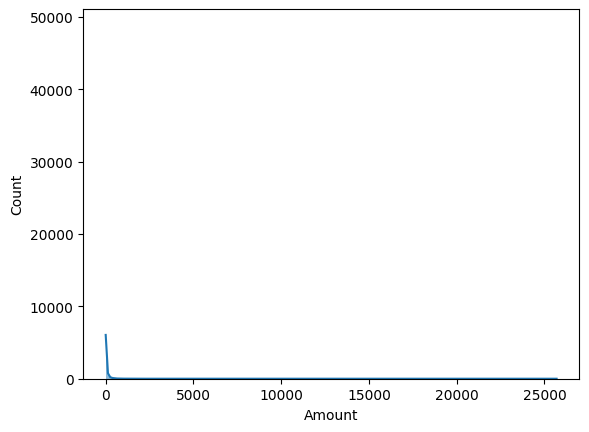

In [79]:
sns.histplot(data=df, x="Amount", kde=True)
plt.show()

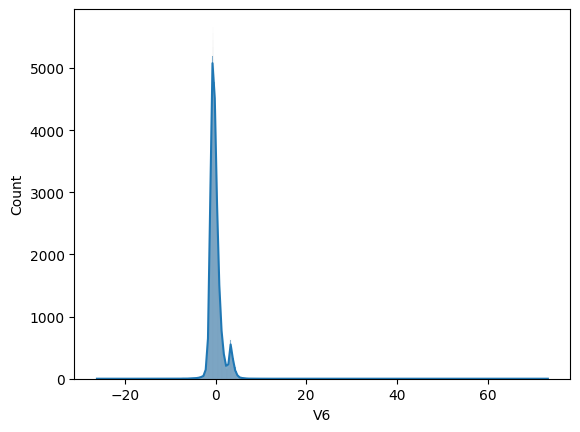

In [80]:
sns.histplot(data=df, x="V6", kde=True)
plt.show()

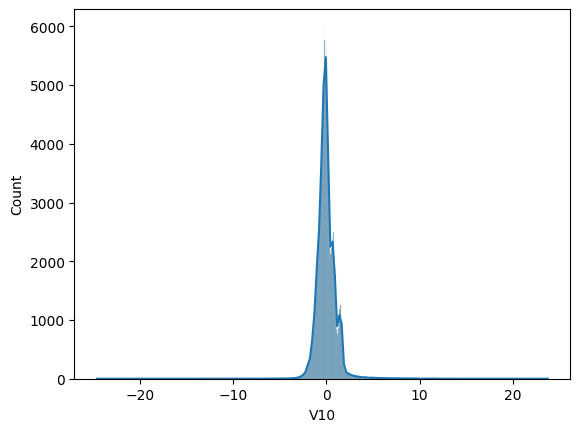

In [81]:
sns.histplot(data=df, x="V10", kde=True)
plt.show()

<Axes: >

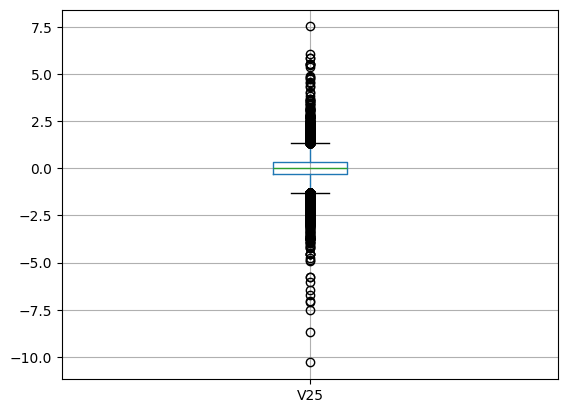

In [82]:
df.boxplot( column =['V25'], grid = True)

<Axes: >

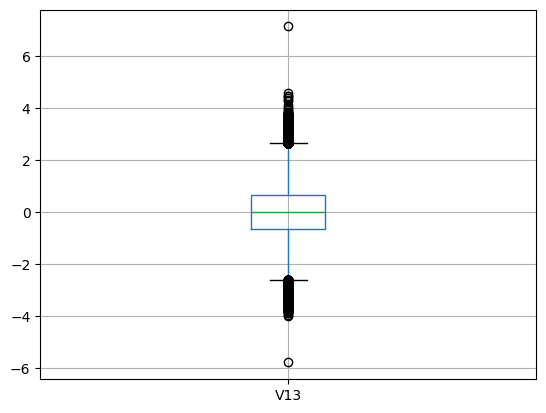

In [83]:
df.boxplot( column =['V13'], grid = True)

<Axes: >

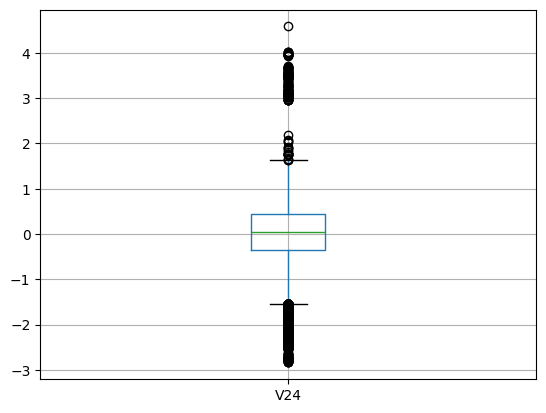

In [84]:
df.boxplot( column =['V24'], grid = True)

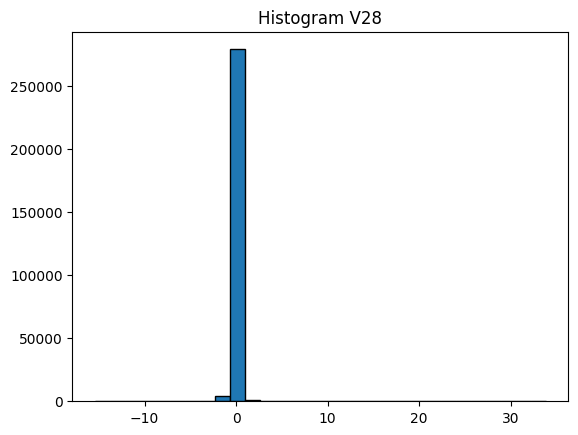

In [85]:
plt.hist(df['V28'], bins=30, edgecolor='black')
plt.title('Histogram V28')
plt.show()